In [1]:
from sktime.annotation.adapters import PyODAnnotator
from pyod.models.iforest import IForest
from sktime.datasets import load_airline

In [2]:
y = load_airline()

In [3]:
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

<AxesSubplot:>

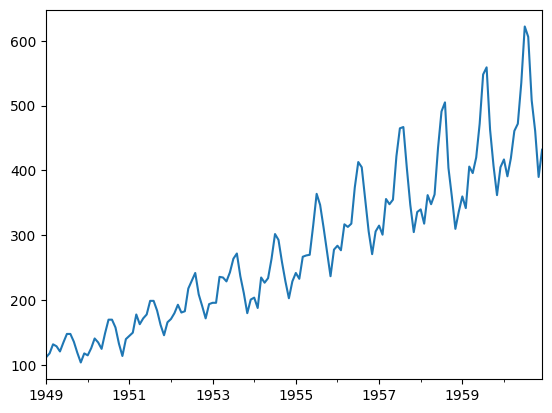

In [9]:
y.plot()

In [4]:
pyod_model = IForest()

In [5]:
pyod_sktime_annotator = PyODAnnotator(pyod_model)
pyod_sktime_annotator.fit(y)

PyODAnnotator(estimator=IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0))

In [6]:
annotated_series = pyod_sktime_annotator.predict(y)

In [7]:
annotated_series

1949-01    1
1949-02    0
1949-03    0
1949-04    0
1949-05    0
          ..
1960-08    1
1960-09    1
1960-10    0
1960-11    0
1960-12    1
Freq: M, Length: 144, dtype: int32

In [8]:
annotated_series.sum()

15